# Weekly Activity (Tutorial 5)

## Directory

In [1]:
import os 
os.chdir("C:/Users/yichu/Desktop/yichun/UTAR/Y2S3/Mini Project/Week 5/Week 5")

In [2]:
%pwd

'C:\\Users\\yichu\\Desktop\\yichun\\UTAR\\Y2S3\\Mini Project\\Week 5\\Week 5'

## Setup

In [3]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1
Convert the code chunk found under section **_"Divide an image into smaller patches using cropping"_** into a function with the following signature:
- crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    height, width = img.shape[:2]

    # M and N are basically number of pixels per patch
    M, N = int(height/num_horizontal_grid), int(width/num_vertical_grid)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
    #         if (height - y) < M or (width - x) < N:
    #             break

            y1 = y + M    # lower right coordinate that will be used to construct rectangle
            x1 = x + N

            # Check whether patch lower right coordinate exceeds image height and width
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
    
            # When patch lower right y-coordinate exceeds patch height
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            # When patch lower right x-coordinate exceeds patch width
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

#Execute the function
img = cv.imread('dog.jfif')
crop_grid(img, 2, 3, (255, 0, 168))

## Exercise 2
- Display image sequences of smooth transition of two images with different values of α. 
- Refer to code in section "Image blending". 
- Use "lena.jfif" and "coins.jfif" as the base images.

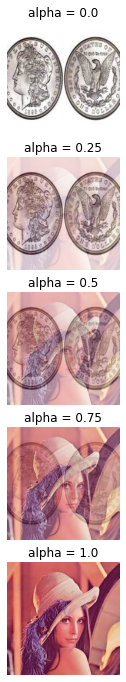

In [5]:
img1 = cv.imread('lena.jfif')
img2 = cv.imread('coins.jfif')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Resize img2
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape)

# define
alpha1 = 0
alpha2 = 1
no_of_sequence = 5 
fig=plt.figure(figsize=(12,12))

for i in range(no_of_sequence): 
    alpha=i*(alpha2 - alpha1)/(no_of_sequence - 1) + alpha1
    beta = 1 - alpha
    dst = cv.addWeighted(img1, alpha, img2, beta, 0)
    ax=fig.add_subplot(no_of_sequence,1,i+1)
    plt.imshow(dst), plt.axis('off')
    ax.set_title('alpha = {}'.format(alpha))

plt.show()


## Exercise 3
Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

In [78]:
img.shape

(225, 225, 3)

In [4]:
import imutils

img = cv.imread('lena.jfif')
img_copy = img.copy()

angle = 45
scale = 1.42

rotated = imutils.rotate(img_copy, angle, (112.5, 112.5), scale)
cv.imshow("45 degree angle", rotated)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 4

Use the images with titles: "flower.jfif" and "native-bee.png". 
- I want to put flower above an image. 
    - If I add two images, it will change color. 
    - If I blend it, I get a transparent effect. 
    - But I want it to be opaque. 
- If it was a rectangular region, we could use the ROI as we did in the previous section. 
- But flower is not a rectangular region. 
- This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. 
- The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). 
- You need to use cv.threshold function to segment the flower.

In [7]:
flower = cv.imread('flower.jfif')
bee = cv.imread('native-bee.png')

# Cut out the flower part only
flower = flower[36:120,90:175]

# Extract rows and columns values from flower shape
rows, cols = flower.shape[:2]

# If pixel intensity is smaller than the set threshold,
# value set to 255 
# else set to 0 (black).
# cv.threshold(src, thresholdValue, maxVal, thresholdingTechnique)
mask = cv.threshold(flower, 60, 255, cv.THRESH_BINARY_INV)[1]

# Display the flower on top of the bee 
# x = 90, y = 35 (Starting coordinate where the flower should be located on bee image)
bee[y: 35 + rows, 90: x + cols] = cv.bitwise_and(bee[y: 35 + rows, x: 90 + cols], mask) 
bee[y: 35 + rows, 90: x + cols] = cv.bitwise_or(bee[y: 35 + rows, x: 90 + cols], flower)

cv.imshow('flower_bee',bee)
cv.waitKey(0)
cv.destroyAllWindows()